In [5]:
import tensorflow as tf
from tensorflow import keras


2023-04-07 17:47:23.709935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.__version__
keras.__version__

'2.10.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Keras originally stores the image arrays as 28x28 matrices w/ pixel intensities represented as integers

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Creating the Model Using the Sequential API
- A Sequential model is the simplest kind of Keras model, for NNs composed of single stack of layers, connected sequentially
- Flatten layer converts input image to 1D array
    - input layer, doesn't have parameters, just preprocessing
- Dense hidden layer manages its own weight matrix and vector of bias terms
- Final layer is dense output w/ 1 neuron per clas using softmax since the classes are exclusive

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers
hidden1 = model.layers[1].name
weights, biases = model.get_layer(hidden1).get_weights()

Model weights are initialized randomly to break symmetry, w/ biases initialized to zero. A different initialization method can be set with kernel_initializer or bias_initializer

In [54]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "sgd",
              metrics=["accuracy"])
model_cloned = keras.models.clone_model(model)
model_cloned.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

We will use many other losses, optimizers and met‐ rics in this book, but for the full lists see https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/ \
First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss


* Can convert sparse labels (class indices) to one-hot vector labesl w/ keras.utils.to_categorical() or np.argmax() fcn w/ axis = 1

"sgd" means model will be trained with Stochastic Gradient Descent to perform backpropagation

### Training and Evaluating the Model
Model is ready to be trained w/ fit()

In [55]:
history = model.fit(X_train, y_train, epochs = 50,
                    validation_data = (X_valid, y_valid),
                    workers=2)

Epoch 1/50
1719/1719 [==============================] - 10s 5ms/step - loss: 0.0794 - accuracy: 0.9735 - val_loss: 0.3367 - val_accuracy: 0.8982
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0797 - accuracy: 0.9723 - val_loss: 0.3471 - val_accuracy: 0.8978
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0796 - accuracy: 0.9735 - val_loss: 0.3451 - val_accuracy: 0.8992
Epoch 4/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0773 - accuracy: 0.9735 - val_loss: 0.3433 - val_accuracy: 0.8994
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0754 - accuracy: 0.9745 - val_loss: 0.3452 - val_accuracy: 0.9018
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9738 - val_loss: 0.3928 - val_accuracy: 0.8900
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0739 - accuracy: 0.9751 - val_loss: 0.3435 - val_accura

In [44]:
history_cloned = model_cloned.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                    workers=2)

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7060 - accuracy: 0.7658 - val_loss: 0.4935 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4894 - accuracy: 0.8313 - val_loss: 0.4423 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4447 - accuracy: 0.8438 - val_loss: 0.4214 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4169 - accuracy: 0.8536 - val_loss: 0.4310 - val_accuracy: 0.8534
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3979 - accuracy: 0.8598 - val_loss: 0.4044 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3798 - accuracy: 0.8647 - val_loss: 0.3736 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3669 - accuracy: 0.8699 - val_loss: 0.3785 - val_accuracy:

History object returned by fit() contains training params(history.params), epochs (history.epcoch), and a dictionary (history.history) containing the loss and extra metrics measured at the end of each epoch. Can use Pandas to plot

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

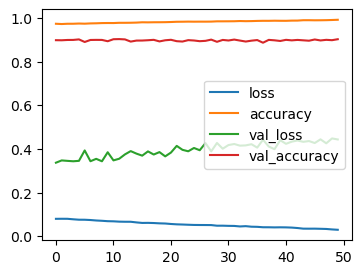

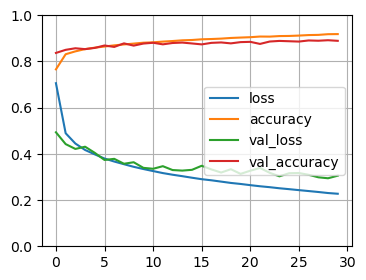

In [56]:
pd.DataFrame(history.history).plot(figsize = (4,3))
pd.DataFrame(history_cloned.history).plot(figsize=(4,3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model was trained more compared with model_cloned. it should perform much better

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 99.0828 - accuracy: 0.8518


[99.08284759521484, 0.8518000245094299]

### Using the Model to Make Predictions

In [53]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 41ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Building a Regression MLP Using the Sequential API
- Main differences between building classification and regression:
    - Output layer has a single neuron (to predict a single value)
    - Uses no activation function
    - Loss function is mean squared error

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [103]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", 
    input_shape=X_train_scaled.shape[1:]), keras.layers.Dense(1)   
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid),
                    workers=2)
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 1.1087 - val_loss: 0.8258
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5665 - val_loss: 0.5096
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4997 - val_loss: 0.4841
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4566
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4576 - val_loss: 0.4478
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4478 - val_loss: 0.4369
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4414 - val_loss: 0.4299
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4354 - val_loss: 0.4262
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4307 - val_loss: 0.4203
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4259 - val_loss: 0.4155

In [104]:
y_pred

array([[2.15674  ],
       [0.7498647],
       [3.602102 ]], dtype=float32)

## Building Complex Models Using the Functional API

In [127]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu")(hidden2)
concat = keras.layers.Concatenate()([input, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

-Notice how layers are used like functions once they are created. For example: in hidden1, the input layer is passed in to tell the layer where to connect to
-Concatenate is used to connect input and hidden2 layers


In [129]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled,  y_train, epochs=30,
                    validation_data=(X_valid_scaled, y_valid),
                    workers=2)
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.2995 - val_loss: 0.4650
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2985 - val_loss: 0.3288
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2972 - val_loss: 0.3268
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2950 - val_loss: 0.3550
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2939 - val_loss: 0.3314
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2965 - val_loss: 0.3226
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2925 - val_loss: 0.3987
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2918 - val_loss: 0.3790
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2909 - val_loss: 0.4383
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2900 - val_loss: 0.3962

You may want to send a subset of the features through one path and a different (possibly overlapping) subset through a deep path. See below

In [24]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss="mse", optimizer="sgd")

In [25]:


X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [23]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    workers=2)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

You may also want multiple outputs:
- Maybe you want to locate and classify the main object in a picture. This is a regression and classification task
- May have multiple independent tasks to perform based on teh same data
    - Can use same neural network for different tasks due to ability to learn features in data
- As a regularization technique (i.e. a training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize)

In [26]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function -> need to pass a list of losses
- We care more about the main output's loss  so will give it a much greater weight

In [157]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
        [X_train_A, X_train_B], [y_train, y_train], epochs=40,
        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
        workers=2)

Epoch 1/40
363/363 [==============================] - 3s 6ms/step - loss: 0.9710 - dense_99_loss: 0.8329 - dense_100_loss: 2.2137 - val_loss: 0.6113 - val_dense_99_loss: 0.5345 - val_dense_100_loss: 1.3029
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5996 - dense_99_loss: 0.5341 - dense_100_loss: 1.1885 - val_loss: 0.5521 - val_dense_99_loss: 0.4933 - val_dense_100_loss: 1.0808
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5577 - dense_99_loss: 0.5057 - dense_100_loss: 1.0253 - val_loss: 0.5299 - val_dense_99_loss: 0.4820 - val_dense_100_loss: 0.9614
Epoch 4/40
363/363 [==============================] - 2s 4ms/step - loss: 0.5138 - dense_99_loss: 0.4702 - dense_100_loss: 0.9063 - val_loss: 0.4987 - val_dense_99_loss: 0.4595 - val_dense_100_loss: 0.8519
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.4960 - dense_99_loss: 0.4609 - dense_100_loss: 0.8113 - val_loss: 0.4853 - val_dense_99_loss: 0.4530

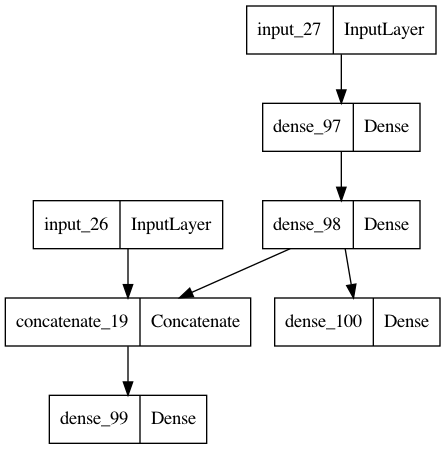

In [158]:
tf.keras.utils.plot_model(model)

In [159]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 99ms/step


# Building Dynamic Models Using the Subclassing API
- Sequential and Functional API are declarative: declare which layers to use and connections -> start feeding model data
- Advantages: model can easily be saved, cloned, shared, its structure displayed and analyzed, errors can be caught early, easy to debug
- Disadvantages: its static
- Using Subclassing API, can add loops, varying shapes, conditional branching and other dynamic behaviors

In [14]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

Creating this class gives you more flexibility w/ the ability to create for loops, if statements, use low-level TF operations, etc. \
This extra flexibility means your model's architechture is hidden w/in call()
- Can only get a list of layers w/out info on how they are connected
    - Could probably make a method w/in class to do this
- Easier to make mistakes, can't easily save or clone architecture

## Saving and Restoring a Model
Saving a trained Keras model: <br>
<code>
model.save("my_keras_model.h5")
</code>
- Saves both the model's architecture and the value of all model parameters for every layer. It also saves the optimizer
- Will typically have a script that trains a model and saves and add'l ones to load model and use it

-To load a model: <br>
```
model = keras.models.load_model("my_keras_model.h5") 
```
- Doesn't work when using Model subclassing
    - can use save_weights() and load_weights() to save and restore model parameters
- With large training sets that could take hours, need to save at the end and at regular checkpoints
    - Use callbacks to tell the fit() method to save

## Using Callbacks
- fit() method accepts a callbacks argument that can specify a list of objects to be called during the start and end of training and/or during training
``` 
[...] # build and compile the model 
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")  history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
```
<br>
- If a validation set is used during training, you can set <code> save_best_only=True</code> using ModelCheckpoint
    - This helps implement early stopping 

```
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                    save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to 
                    best  model
```
- Can also just use the EarlyStopping callback 
``` 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                      restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[checkpoint_cb, early_stopping_cb])
```
Custom callback:
```
class PrintValTrainRatioCallback(keras.callbacks.Callback): def on_epoch_end(self, epoch, logs):
print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
```
<br>
- Can change when the callback is implemented with on_train_begin(), on_train_end(), on_epoch_begin()...


## Visualization Using TensorBoard
- must modify your program so that it outputs data to visualize to special binary log files called event files
- Each binary record is called a summary
    - TensorBoard server will monitor log directory, automatically pick up changes and update visualizations
    - Write to different subdirectory every time it runs to compare data between runs

In [2]:
import os
import time

In [3]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
    

In [18]:
model.call([X_train_A, X_train_B]) #.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

(<tf.Tensor: shape=(11610, 1), dtype=float32, numpy=
 array([[-3.9380568e-01],
        [ 2.3260915e-01],
        [-1.2930308e-04],
        ...,
        [-4.9869254e-01],
        [ 2.5163606e-01],
        [-2.3401736e-01]], dtype=float32)>,
 <tf.Tensor: shape=(11610, 1), dtype=float32, numpy=
 array([[-0.11978765],
        [-0.16178036],
        [ 0.05858804],
        ...,
        [-0.29009983],
        [-0.15356521],
        [-0.12667227]], dtype=float32)>)

In [30]:
# [...]  Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=0.03))
history = model.fit(
        [X_train_A, X_train_B], [y_train, y_train], epochs=40,
        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
        workers=2, callbacks=[tensorboard_cb])

/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
363/363 [==============================] - 3s 5ms/step - loss: 0.5392 - dense_17_loss: 0.4930 - dense_18_loss: 0.9547 - val_loss: 0.5450 - val_dense_17_loss: 0.4973 - val_dense_18_loss: 0.9738
Epoch 2/40
363/363 [==============================] - 2s 4ms/step - loss: 0.5393 - dense_17_loss: 0.4932 - dense_18_loss: 0.9541 - val_loss: 0.5436 - val_dense_17_loss: 0.4937 - val_dense_18_loss: 0.9928
Epoch 3/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5411 - dense_17_loss: 0.4949 - dense_18_loss: 0.9569 - val_loss: 0.5466 - val_dense_17_loss: 0.4985 - val_dense_18_loss: 0.9795
Epoch 4/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5382 - dense_17_loss: 0.4924 - dense_18_loss: 0.9501 - val_loss: 0.5419 - val_dense_17_loss: 0.4921 - val_dense_18_loss: 0.9899
Epoch 5/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5384 - dense_17_loss: 0.4923 - dense_18_loss: 0.9533 - val_loss: 0.5413 - val_dense_17_loss: 0.4903 - val_de

After running, this will create TensorBoard event logs. To view TB, make sure you are in the Keras/TF environment and run: <br>
<code> $ tensorboard --logdir=./my_logs --port=6006 <br>
    TensorBoard 2.0.0 at http://mycomputer.local:6006 (Press CTRL+C to quit)
</code> <br>
Then open up a web browser to <link> http://localhost:6006 </link>


## Fine-Tuning Neural Network Hyperparameters
- How to know the combo of hyperparameters best for your task?
    - Try many combinations: use <italics> GridSearchCV </italics> or <italics> RandomizedSearchCV </italics> to explore hyperparameter space
        - need to wrap Keras models in objects to modify params

In [34]:
def build_model(n_hidden=1,n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

It is good practice to provide reasonable defaults for as many hyperparameters as you can

In [35]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/xc/zkw390zs49vd6b73myjws_n40000gn/T/ipykernel_1491/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [40]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)],
              workers=2)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.4652 - val_loss: 3.1208
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8345 - val_loss: 0.5960
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5545 - val_loss: 0.5434
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5111 - val_loss: 0.5101
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4859 - val_loss: 0.4899
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4799
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4602 - val_loss: 0.4753
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4524 - val_loss: 0.4646
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4456 - val_loss: 0.4595
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4401 - val_lo

In [41]:
mse_test = keras_reg.score(X_test_scaled, y_test)
X_new = X_test_scaled[:3]
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 145ms/step


We want to train hundreds of variants and see which on performs best on the validation set. It is preferable to use a randomized search due to the amount of hyperparameters compared with a grid search

In [43]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [44]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                                  callbacks=[keras.callbacks.EarlyStopping(patience=10)],
                                  workers=2)


Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 1.2938 - val_loss: 1.0528
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6776 - val_loss: 0.5892
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5595 - val_loss: 0.5236
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5074 - val_loss: 0.4890
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4726 - val_loss: 0.4756
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4505 - val_loss: 0.4406
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4327 - val_loss: 0.4305
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4195 - val_loss: 0.4162
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4088 - val_loss: 0.4111
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4011 - val_lo

/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-3.17744176e-01 -3.88463080e-01 -3.12540660e-01 -3.28074882e-01
 -3.46751223e-01 -4.07552640e-01 -3.68954092e-01             nan
             nan -5.53972804e+10]
  warnings.warn(


363/363 [==============================] - 2s 3ms/step - loss: 0.7563 - val_loss: 1.2069
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6139 - val_loss: 0.5102
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4501 - val_loss: 0.6461
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4394 - val_loss: 0.4729
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3946 - val_loss: 0.4034
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3787 - val_loss: 0.3907
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3711 - val_loss: 0.3728
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3617 - val_loss: 0.3758
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3567 - val_loss: 0.3648
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3507 - val_loss: 0.3532
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x1772c5970>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1738f8610>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Note that RandomizedSearchCV uses K-fold cross-validation.
After the run is finished, the best paramters, score and trained model can be accessed:
``` cl
>>> rnd_search_cv.best_params_

>>> rnd_search_cv.best_score_

>>> model = rnd_search_cv.best_estimator_.model
```

- This method works well for many fairly simple problems
- When training is slow, this will only explore a tiny portion of the space
- Other methods exist based on the idea of exploring the space, finding good regions and continuing to expore around these regions. Here are a few Python libraries
    - Hyperopt
    - Hyperas, kopt, or Talos: optimizing hps for Keras model
    - Scikit-Optimize (skopt): general purpose optimization library
    - Spearmint: a Bayesian optimization library
    - Sklearn-Deap: a hp optimization library based on evolutionary algos, also with a GridSearchCV like interface
- Several other tools: AutoML, Uber's Deep Neuroevolution

In [45]:
rnd_search_cv.best_params_
rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model

In [47]:
total_loss= model.evaluate(
    X_test_scaled, y_test)
y_pred_main = model.predict(X_new)

1/1 [==============================] - 0s 31ms/step


In [48]:
rnd_search_cv.best_params_


{'learning_rate': 0.009678477383068684, 'n_hidden': 2, 'n_neurons': 74}

## Number of Hidden Layers
- A single hidden layer network can model very complex functions with enough neurons
- But, deep networks have a much higher parameter efficiency than shallow ones
    - Can model complex functions using exponentially fewer neurons than shallow nets -> much better performance w/ same amount of training data
    - DNNs take advantage of hierarchical architecture in data to model different levels of the problem
        - Converge faster to a good solution and improves ability to generalize to new datasets
    - Transfer learning is the reuse of lower level structures in a DNN to prevent the need to start learning from scratch

## Number of Neurons per Hidden Layer
- Generally can use the same number of neurons in all layers
- Can try increasing the # of neurons gradually until the network starts overfitting
- Will generally get more bang for the buck by increasing the # of layers than the # of neurons per layer
- Can also use a model w/ more layers and neurons than you need and use early stopping to prevent overfitting

## Learning Rate, Batch Size, and Other Hyperparameters
Learning rate is arguably the most important hp:
- Optimal LR is generally about half of the max LR (the LR above which the training algo diverges)
- Start w/ a large value that causes divergence -> divide this by 3 -> iterate until training algo stops diverging <br>
Batch size:
- Generally, optimal batch size is lower than 32
- Small batch ensures each training iteration is very fast
- Batch size greater than 10 helps take advantage of hardware and software optimizations, (matrix multiplication) to speed up training <br>
Activation Function:
-Generally, ReLU will be a good default for hidden layers
- Output layer activation function is dependent on task
<link> https://arxiv.org/abs/1206.5533 </link> <br>
paper w/ recommends for hp parameters

## Selected Exercises

3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier? <br> <br>
A: Classical Perceptrons make predictions based on a hard threshold rather than a class probability. Logistic regression classifiers output a class probability. Multiple layers can be added to a perceptron to improve this limitation <br> <br>

4. Why was the logistic activation function (sigmoid) a key ingredient in training the first MLPs? <br> <br>
A: The logistic activation function allows gradient descent to be used to adjust weights of the connections as opposed to having a discrete 0 or 1. The sigmoid function is smooth and differentiable allowing a probability-like value to be output. Enables backpropagation <br> <br>

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function. 
- What is the shape of the input matrix X? 
- What about the shape of the hidden layer’s weight vector W_h, and the shape of its bias vector b_h? 
- What is the shape of the output layer’s weight vector W_o, and its bias vector b_o?
- What is the shape of the network’s output matrix Y?
- Write the equation that computes the network’s output matrix Y as a function of X, W_h, b_h, W_o and b_o. <br> <br>

A: <br>
-  $X - [1 x 10] $<br>
$W_h - [10 x 50] $ <br>
$B_h - [1 x 50] $ <br>
$ W_o [50 x 3] $ <br>
$ B_o - [1 x 3] $ <br>
$ Y =  \phi(\phi(X*W_h + B_h)*W_o + B_o) $ <br> 


7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? <br> <br>

A: <br>
- 1 neuron is needed in the output layer with a logistic activation function to classify email into spam or ham. <br>
For MNIST, you'd want 10 output neurons to represent the possibility of each number 0-9 and use a softmax function to make a probability distribution across the output neurons for the numbers that adds to 1.
<br> <br>

9. Can you list all the hyperparameters you can tweak in an MLP? If the MLP over‐ fits the training data, how could you tweak these hyperparameters to try to solve the problem? <br> <br>
A: <br>
-Learning rate, number of hidden layers, number of neurons per layer, shape of network, batch size, activation function, training epochs (early stop can mitigate too many), optimizer choice, loss function
- Early stopping can help to mitigate overfitting so watching when the validation loss isn't improving more, can also decrease model complexity such as # of layers and # of neurons per layer, regularization can also impact this





10. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).

## Training a deep MLP on MNIST

In [50]:
# Training a deep MLP on MNIST
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [52]:
X_train_full.shape

(60000, 28, 28)

In [53]:
X_train_full.dtype

dtype('uint8')

In [54]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[:5000] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[:5000]

In [78]:
def build_model(n_hidden=6, n_neurons=40, learning_rate=3e-3, input_shape=[28, 28]):
    num_output_neurons = 10
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layers in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(num_output_neurons, activation="softmax"))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)
model = build_model()




In [79]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_122 (Dense)           (None, 40)                31400     
                                                                 
 dense_123 (Dense)           (None, 40)                1640      
                                                                 
 dense_124 (Dense)           (None, 40)                1640      
                                                                 
 dense_125 (Dense)           (None, 40)                1640      
                                                                 
 dense_126 (Dense)           (None, 40)                1640      
                                                                 
 dense_127 (Dense)           (None, 40)              

In [80]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data= (X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
                    workers=2)

Epoch 1/100
157/157 [==============================] - 3s 8ms/step - loss: 2.3043 - accuracy: 0.1022 - val_loss: 2.2979 - val_accuracy: 0.1252
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2927 - accuracy: 0.1482 - val_loss: 2.2869 - val_accuracy: 0.1652
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2811 - accuracy: 0.1646 - val_loss: 2.2740 - val_accuracy: 0.1688
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 2.2658 - accuracy: 0.1698 - val_loss: 2.2554 - val_accuracy: 0.1694
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 2.2431 - accuracy: 0.1790 - val_loss: 2.2282 - val_accuracy: 0.1848
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 2.2109 - accuracy: 0.1900 - val_loss: 2.1911 - val_accuracy: 0.2014
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 2.1701 - accuracy: 0.2076 - val_loss: 2.1469 - val_accuracy: 0.2120

In [84]:
total_loss= model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 79.6227 - accuracy: 0.8988


In [85]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 [==============================] - 0s 52ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
import time
import os

In [129]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)



In [86]:
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data= (X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10),
                               tensorboard_cb],
                    workers=2)

Epoch 1/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0623 - accuracy: 0.9858 - val_loss: 0.0648 - val_accuracy: 0.9840
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0602 - accuracy: 0.9876 - val_loss: 0.0606 - val_accuracy: 0.9868
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0579 - accuracy: 0.9884 - val_loss: 0.0667 - val_accuracy: 0.9838
Epoch 4/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0576 - accuracy: 0.9882 - val_loss: 0.0544 - val_accuracy: 0.9894
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0559 - accuracy: 0.9898 - val_loss: 0.0758 - val_accuracy: 0.9784
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9900 - val_loss: 0.0497 - val_accuracy: 0.9912
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0521 - accuracy: 0.9910 - val_loss: 0.0580 - val_accuracy: 0.98

In [90]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/var/folders/xc/zkw390zs49vd6b73myjws_n40000gn/T/ipykernel_1491/2409665360.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [89]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [91]:
keras_class.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                workers=2)

Epoch 1/100
157/157 [==============================] - 2s 9ms/step - loss: 2.3040 - accuracy: 0.1032 - val_loss: 2.2982 - val_accuracy: 0.1264
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 2.2930 - accuracy: 0.1518 - val_loss: 2.2871 - val_accuracy: 0.1796
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2813 - accuracy: 0.1988 - val_loss: 2.2743 - val_accuracy: 0.2144
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2662 - accuracy: 0.2352 - val_loss: 2.2561 - val_accuracy: 0.2572
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2431 - accuracy: 0.2740 - val_loss: 2.2268 - val_accuracy: 0.2930
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 2.2049 - accuracy: 0.3088 - val_loss: 2.1774 - val_accuracy: 0.3294
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 2.1417 - accuracy: 0.3492 - val_loss: 2.0980 - val_accuracy: 0.3626

In [92]:
param_distribs = {
    "n_hidden": np.arange(1,4),
    "n_neurons": np.arange(20, 80),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                  workers=2
                  )

Epoch 1/100
105/105 [==============================] - 3s 11ms/step - loss: 2.3002 - accuracy: 0.0903 - val_loss: 2.2982 - val_accuracy: 0.0892
Epoch 2/100
105/105 [==============================] - 1s 8ms/step - loss: 2.2971 - accuracy: 0.0969 - val_loss: 2.2953 - val_accuracy: 0.0948
Epoch 3/100
105/105 [==============================] - 1s 8ms/step - loss: 2.2941 - accuracy: 0.1032 - val_loss: 2.2925 - val_accuracy: 0.1010
Epoch 4/100
105/105 [==============================] - 1s 10ms/step - loss: 2.2913 - accuracy: 0.1074 - val_loss: 2.2897 - val_accuracy: 0.1080
Epoch 5/100
105/105 [==============================] - 1s 13ms/step - loss: 2.2885 - accuracy: 0.1131 - val_loss: 2.2871 - val_accuracy: 0.1116
Epoch 6/100
105/105 [==============================] - 2s 15ms/step - loss: 2.2857 - accuracy: 0.1176 - val_loss: 2.2844 - val_accuracy: 0.1196
Epoch 7/100
105/105 [==============================] - 4s 35ms/step - loss: 2.2830 - accuracy: 0.1245 - val_loss: 2.2818 - val_accuracy: 0

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x17a75feb0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17a6bbd30>,
                                        'n_hidden': array([1, 2, 3, 4, 5, 6, 7]),
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [93]:
rnd_search_cv.best_params_

{'learning_rate': 0.005349081049562388, 'n_hidden': 1, 'n_neurons': 60}

In [94]:
rnd_search_cv.best_score_

0.9092010060946146

In [100]:
model = rnd_search_cv.best_estimator_.model
model.save("keras_model_mnist_1st_rnd_search.h5")

In [101]:
def create_params_around_best():
    best_params = rnd_search_cv.best_params_
    num_hidden = np.arange(best_params['n_hidden'] - 1, best_params['n_hidden'] + 3)
    num_neurons = np.arange(best_params['n_neurons'] - 10, best_params['n_neurons'] + 10)
    learning_rate = reciprocal(best_params['learning_rate'] * 0.5, best_params['learning_rate'] * 1.5)
    
    
    param_distribs = {
    "n_hidden": num_hidden,
    "n_neurons": num_neurons,
    "learning_rate": learning_rate,
    "batch_size": [10, 20, 30],
    }
    return param_distribs

opt_param_distribs = create_params_around_best()

In [102]:
rnd_search_cv_opt = RandomizedSearchCV(keras_class, opt_param_distribs, n_iter=10, cv=3)
rnd_search_cv_opt.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                  workers=2
                  )

Epoch 1/100
167/167 [==============================] - 3s 11ms/step - loss: 2.1817 - accuracy: 0.2430 - val_loss: 2.0770 - val_accuracy: 0.3836
Epoch 2/100
167/167 [==============================] - 1s 7ms/step - loss: 1.9126 - accuracy: 0.5281 - val_loss: 1.7367 - val_accuracy: 0.6172
Epoch 3/100
167/167 [==============================] - 1s 7ms/step - loss: 1.4945 - accuracy: 0.6703 - val_loss: 1.2849 - val_accuracy: 0.7140
Epoch 4/100
167/167 [==============================] - 1s 7ms/step - loss: 1.0736 - accuracy: 0.7531 - val_loss: 0.9367 - val_accuracy: 0.7732
Epoch 5/100
167/167 [==============================] - 1s 6ms/step - loss: 0.8045 - accuracy: 0.8005 - val_loss: 0.7411 - val_accuracy: 0.8080
Epoch 6/100
167/167 [==============================] - 1s 6ms/step - loss: 0.6517 - accuracy: 0.8299 - val_loss: 0.6270 - val_accuracy: 0.8334
Epoch 7/100
167/167 [==============================] - 1s 6ms/step - loss: 0.5526 - accuracy: 0.8596 - val_loss: 0.5547 - val_accuracy: 0.849

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x17a75feb0>,
                   param_distributions={'batch_size': [10, 20, 30],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x178023190>,
                                        'n_hidden': array([0, 1, 2, 3]),
                                        'n_neurons': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69])})

In [103]:
rnd_search_cv_opt.best_params_

{'batch_size': 10,
 'learning_rate': 0.0071704255138615785,
 'n_hidden': 2,
 'n_neurons': 59}

In [104]:
rnd_search_cv_opt.best_score_

0.9194000164667765

In [105]:
model = rnd_search_cv_opt.best_estimator_.model
model.save("keras_model_mnist_2nd_rnd_search.h5")

In [106]:
total_loss= model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 72.2005 - accuracy: 0.9251


In [107]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred.round(3)

1/1 [==============================] - 0s 123ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [119]:
model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                workers=2)

Epoch 1/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.00

In [120]:
total_loss= model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 76.8283 - accuracy: 0.9266


In [121]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred.round(3)

1/1 [==============================] - 0s 39ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Test a wide and deep model 

In [108]:
X_train_A, X_train_B = X_train[:, :14], X_train[:, 12:]
X_valid_A, X_valid_B = X_valid[:, :14], X_valid[:, 12:]
X_test_A, X_test_B = X_test[:, :14], X_test[:, 12:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [131]:
def build_complex_model(n_hidden=3, n_neurons=40, learning_rate=3e-3, input_shape=[28, 28]):
    num_output_neurons = 10
    options = {"input_shape": input_shape}
    # flatten_A = keras.layers.Flatten(input_shape=input_shape)
    input_1 = keras.layers.Input(shape=input_shape)
    input_2 = keras.layers.Input(shape=input_shape)
    # input_B = keras.Input(shape=input_shape)
    # input_A = keras.layers.Flatten()(input_1)
    # input_B = keras.layers.Flatten()(input_2)
    for i in range(n_hidden):
        if i == 0:
            hidden = keras.layers.Dense(n_neurons, activation="relu")(input_B)
        else:
            hidden = keras.layers.Dense(n_neurons, activation="relu")(hidden)
    concat = keras.layers.concatenate([input_A, hidden], axis=1)
    aux_output = keras.layers.Dense(num_output_neurons, activation="softmax")(hidden)
    main_output = keras.layers.Dense(num_output_neurons, activation="softmax")(concat)
    optimizer = keras.optimizers.SGD(learning_rate)
    model = keras.models.Model(inputs=[input_A, input_B], 
                                    outputs=[main_output, aux_output])
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)
model = build_complex_model()

In [132]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_359 (Dense)              (None, 40)           280         ['input_6[0][0]']                
                                                                                                  
 dense_360 (Dense)              (None, 40)           1640        ['dense_359[0][0]']              
                                                                                                  
 input_5 (InputLayer)           [(None, 5)]          0           []                               
                                                                                            

In [133]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_complex_model)

/var/folders/xc/zkw390zs49vd6b73myjws_n40000gn/T/ipykernel_1491/977379048.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_complex_model)


In [134]:
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=80,
                validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                workers=2)

Epoch 1/80


ValueError: in user code:

    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/drewimhof/micromamba/envs/robostackenv/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14, 28)


In [ ]:
keras_class.fit([X_train_A, X_train_B], [y_train, y_train], epochs=80,
                validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                callbacks=[keras.callbacks.EarlyStopping(patience=10),
                           tensorboard_cb],
                workers=2)